Notes: 
  - standart img format for functios: numpy.ndarray


# Import, Config and utils

In [1]:
# Linux bash command
! sudo apt-get install curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [30]:
# Imports nice thingies
import sys
import requests
from io import BytesIO
from urllib.request import urlopen

import cv2
from PIL import Image
from matplotlib import pyplot as plt

import numpy as np
from random import randint

from google.colab.patches import cv2_imshow
from sklearn.datasets import load_sample_image

url = "https://image.freepik.com/free-photo/pretty-student-girl-with-ginger-hair-knot-relaxing-home-after-college-headshot-tender-charming-young-woman-with-freckles-wearing-white-blouse-posing_273609-496.jpg" 

In [31]:
# Some utils
def show_array_photo(array):
  plt.imshow(array, interpolation='nearest')
  plt.show()

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

# Loading the raw image

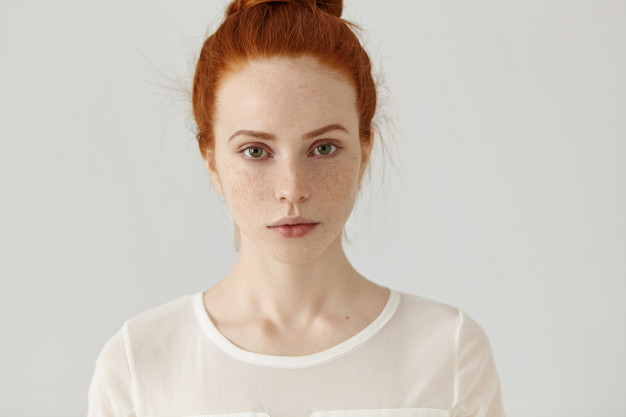

numpy.ndarray

In [32]:
raw_img = url_to_image(url)
cv2_imshow(raw_img)
type(raw_img)

# Using face detection

In [33]:
def get_face_coord(img):
  # read the recognition data
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
  # prepare image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = np.array(gray, dtype='uint8')

  # detect faces
  faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
  )
  print(f"Got faces: {[face for face in faces]}")
  return faces


def show_img_with_face_detect(img,faces):
  # Draw a rectangle around the faces

  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
  cv2_imshow(img)


Got faces: [array([191,  71, 201, 201], dtype=int32)]


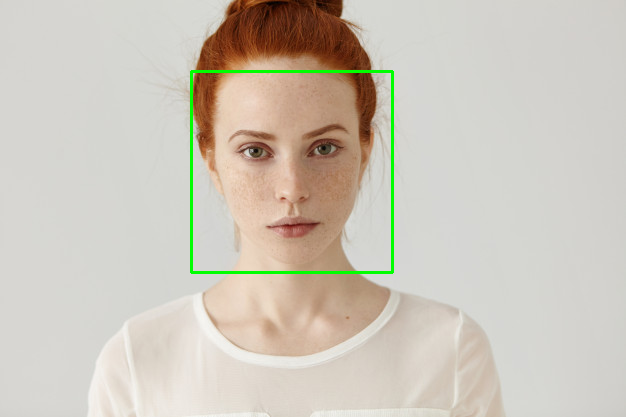

In [34]:
faces = get_face_coord(raw_img)
show_img_with_face_detect(raw_img,faces)


# Mashing the photo

In [53]:
# CONFIG
photo = url_to_image(url)
faces = get_face_coord(photo)
TARGET_PERCENT = 6 # target percent of picels
INFLICTION_RANGE = (0,25)  # up and down range of each target pixel

Got faces: [array([191,  71, 201, 201], dtype=int32)]


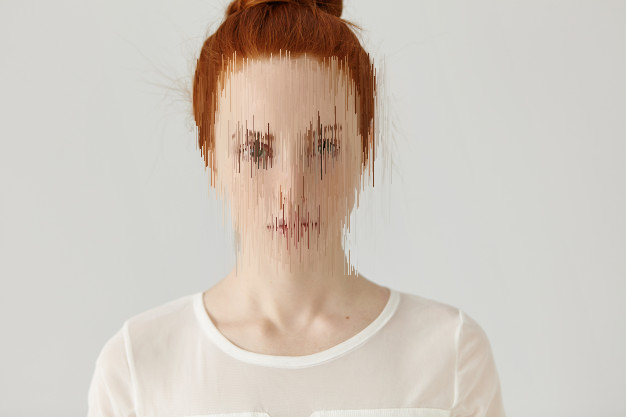

In [58]:
new_img  = url_to_image(url)

for (x, y, w, h) in faces:

  # manually adjust x,y,w,h
  # x += 30
  # w -= 60

  # y -= 50

  for i in range(y,y+h):
    for j in range(x,x+w):

      if randint(1,100) < TARGET_PERCENT:
        up = randint(INFLICTION_RANGE[0],INFLICTION_RANGE[1])
        down  = randint(INFLICTION_RANGE[0],INFLICTION_RANGE[1])

        if up > i:
          up = i - randint(0,5)
        
        if i + down > y+h:
          down = y+h - i + randint(0,5)

        # modify up
        for m_index in range(0,up):
          new_img[i-m_index][j] = new_img[i][j]
          # new_img[i-m_index][j] = (255,255,255)

        # modify down
        for m_index in range(0,down):
          new_img[i+m_index][j] = new_img[i][j]
          # new_img[i-m_index][j] = (255,255,255)


cv2_imshow(new_img)